# Part A | Defining the Question

Objectives of the Boulder County Assessor’s Office

Based on the assessors’ message, the Boulder County Assessor’s Office is asking for an analysis that helps them meet two core goals:

1. Ensure that residential properties are assessed fairly and consistently across Boulder County.
They want to understand which attributes most strongly influence home values and whether current assessment practices appropriately reflect those patterns and take into consideration market areas. They are also interested in whether subdivision data will provide more accurate or equitable valuation than consdiering the market area groups. 

2. Identify which types of homes are in highest demand.
The mayor wants to create a housing policy and encourage builders to construct homes that meet the needs of current and future residents. The assessor’s office wants to know which property attributes (e.g., living area, lot size, design, amenities, location) are associated with higher market value or stronger demand. 

Population of Interest, Available Data, and Implications for Analysis

Population of interest
All residential single-family homes in Boulder County within the designated market areas (101, 102, 103, 105, 107, 109). The assessor’s office wants to know what characteristics and valuation patterns across all such homes, not only the ones that sold recently.

Three questions: 
1.  Do subdivision level comparisons provide more consistent and equitable valuation patterns than market-area-based assessments alone? 
This directly addresses the office’s concern that market areas may be too broad and that subdivisions might better capture true market similarity. Results could influence assessment methodology.

2. . What property characteristics (e.g., square footage, lot size, design tier, garage/basement availability) most strongly predict adjusted sale price across Boulder County?
This informs whether the current valuation model aligns with the actual drivers of market value and supports the fairness objective.

3. Which home types are in highest demand, and how do those patterns vary across market areas and subdivisions?
This question supports the mayor’s interest in promoting construction incentives aligned with buyer demand.


# Part B | Getting the Data

Load the following datasets into your environment:
    `property.csv`
    `building.csv`
    `land.csv`
   ` valuations.csv`
    `sales.csv`
    `time_trend_adjustment.csv`
Create an adjusted_sales_price using the time and location trend adjustment factor.
Engineer at least three new features for the data frame.
Ensure the rest of the data is tidy.


In [110]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load all the datasets
building_df = pd.read_csv('./datasets/building.csv')
land_df = pd.read_csv('./datasets/land.csv')
property_df = pd.read_csv('./datasets/property.csv')
sales_df = pd.read_csv('./datasets/sales.csv')
time_trend_adjustments_df = pd.read_csv('./datasets/time_trend_adjustments.csv')
valuations_df = pd.read_csv('./datasets/valuations.csv')

In [111]:
# drop the unnamed index column from the csv
time_trend_adjustments_df.drop(columns=time_trend_adjustments_df.columns[0], axis=1, inplace=True)

# split transaction date into year/month/day so we can join on it
sales_df[['year','month','day']] = sales_df['transaction_date'].str.split('-', expand=True)

# reshape the adjustment factors from wide to long format
# each row will have year, month, market_area, and the adjustment factor
time_trend_adjustments_df_melted = pd.melt(time_trend_adjustments_df, id_vars=['year','month'],                                
        var_name='market_area', value_name='adjustment_factor')
time_trend_adjustments_df_melted['year']=time_trend_adjustments_df_melted['year'].astype(str)
time_trend_adjustments_df_melted['month']=time_trend_adjustments_df_melted['month'].astype(str)

# merge sales with adjustment factors and calculate adjusted price
sales_time_trend_adjustment_df = sales_df.merge(time_trend_adjustments_df_melted, on=['year','month'], how='left')
sales_time_trend_adjustment_df['adjusted_sales_price'] = sales_time_trend_adjustment_df.price * sales_time_trend_adjustment_df.adjustment_factor

In [112]:
# join all the tables together on strap
# start with valuations, then add property info, building details, and land
df = valuations_df.merge(property_df, on='strap', how='left')
df = df.merge(building_df, on='strap', how='left')
df = df.merge(land_df, on='strap', how='left', suffixes=('', '_land'))
df.describe()

,tax_yr,bld_appraised_val,land_appraised_val,total_appraised_val,bld_assessed_val,land_assessed_val,total_assessed_val,market_area,sub_code,section,...,nbr_three_qtr_baths,nbr_half_baths,nbr_rooms_nobath,total_finished_sqft,mainfloor_sqft,bsmt_sqft,ext_wall_code,land_class,sqft,acreage
count,3962.0,3.962000e+03,3.962000e+03,3.962000e+03,3960.000000,0.0,3962.000000,3962.000000,3962.000000,3962.000000,...,3960.000000,3960.000000,3960.000000,3563.000000,3552.000000,2242.000000,3796.000000,3962.000000,3962.000000,3962.000000
mean,2024.0,9.236000e+05,1.195717e+06,2.119317e+06,61738.478535,NaN,138353.915952,104.778142,4895.477537,27.898788,...,0.654545,0.362879,7.000253,1998.427449,1360.340653,852.958073,39.039779,1112.169107,8909.002776,0.204431
std,0.0,8.054223e+05,5.753425e+05,1.186266e+06,54008.637305,NaN,79471.842856,2.846400,3113.481905,9.072855,...,0.856371,0.542590,3.260323,965.375494,577.330701,471.134175,29.069110,16.129343,11519.161883,0.264534
min,2024.0,0.000000e+00,2.101750e+05,2.468000e+05,0.000000,NaN,12851.000000,101.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,144.000000,30.000000,47.000000,0.000000,100.000000,25.000000,0.000000
25%,2024.0,4.006000e+05,8.424925e+05,1.369000e+06,26733.000000,NaN,88039.750000,102.000000,1913.000000,29.000000,...,0.000000,0.000000,5.000000,1303.000000,980.000000,504.000000,10.000000,1112.000000,5798.000000,0.133000
50%,2024.0,7.053000e+05,1.041450e+06,1.785600e+06,47054.500000,NaN,115983.500000,105.000000,4888.000000,30.000000,...,0.000000,0.000000,7.000000,1847.000000,1274.500000,790.500000,30.000000,1112.000000,6985.000000,0.160000
75%,2024.0,1.181925e+06,1.408000e+06,2.500375e+06,78931.000000,NaN,163883.500000,107.000000,8343.000000,31.000000,...,1.000000,1.000000,9.000000,2478.500000,1650.000000,1121.500000,70.000000,1112.000000,9837.500000,0.226000
max,2024.0,7.037300e+06,6.585700e+06,1.126890e+07,471499.000000,NaN,751331.000000,109.000000,9921.000000,36.000000,...,10.000000,3.000000,19.000000,8734.000000,5582.000000,4214.000000,140.000000,1140.000000,447958.000000,10.284000


## 3 New Features

To help the Boulder County Assessor’s Office better understand the drivers of residential property value, three new features were created. These features were chosen because they directly relate to the physical characteristics and design elements that homeowners and buyers consider most important, and they help reveal patterns not easily observed in the raw dataset.

1. Price per Square Foot**
Definition:
The adjusted sale price divided by the home’s total finished square footage.
Why:
Price per square foot is one of the most widely used measures in residential real estate to compare properties of different sizes on a consistent scale. Creating this feature allows the analysis to:
* Normalize sale prices across homes of varying sizes
* Identify unusually high- or low-value properties
* Compare value patterns across subdivisions and market areas
* Support the assessor’s goal of evaluating whether current valuation practices reflect observed market relationships
This metric also strengthens Research Question #2 by helping identify which characteristics (e.g., location, design, amenities) explain meaningful variation in property value.

2. Has Basement or Garage
Definition:
A binary indicator equal to 'True'if a home has either a basement or an enclosed car storage structure (garage or carport).
Why:
Basements and garages are high-demand amenities among buyers. They provide storage, utility space, storm protection, parking, and increased functional living capacity. Including this indicator helps:
* Examine whether homes with these amenities drive up the sales price
* Understand buyer preferences, supporting the mayor’s request to identify “which types of homes are in highest demand”
* Investigate whether these amenities are consistently valued across market areas

This feature also clarifies missingness:
If car_storage_type or bsmt_sqft is “missing,” it does not indicate a data problem, it simply means the home does not have the amenity. Creating this explicit indicator improves interpretability and avoids misleading conclusions during EDA.

3. Design Value Tier (One-Story vs. Two-Story)
Definition:
Homes are grouped by architectural design category (e.g., one-story vs. two-story), and within each design group, properties are assigned to low, mid, or high value tiers based on relative price per square foot.
Why:
Design plays a major role in both construction cost and market appeal. Two homes of the same size can differ significantly in value depending on their layout, style, and functional efficiency. This feature helps:
* Reveal whether certain designs systematically command higher prices
* Compare homes fairly within design groups (e.g., one-story homes compared only to other one-story homes)
* Support the assessor’s objective of improving valuation fairness by controlling for design related differences
* Identify demand patterns that may help guide future housing policy
Because design groups vary in size and pricing distribution, assigning value tiers (low/mid/high) within each design type offers a normalized view of how homes compare to their design peers.

In [113]:
# feature 1: price per square foot - lets us compare homes of different sizes
df['price_per_sqft'] = df['total_appraised_val'] / df['total_finished_sqft']

# feature 2: does the home have a garage or basement?
# true if there's any car storage type OR if basement sqft > 0
df['has_car_storage_or_basement'] = ( df['car_storage_type'].notna() | (df['bsmt_sqft'].fillna(0) > 0))

# feature 3: design value tier
# groups homes by design type and assigns low/mid/high based on price per sqft
# this way we can compare a ranch to other ranches, not to 2-story homes
def assign_tier(group):
    try:
        return pd.qcut(
            group['price_per_sqft'], 
            q=3, 
            labels=['low', 'mid', 'high'],
            duplicates='drop'
        )
    except ValueError:
        # if not enough unique values, just call it mid
        return pd.Series(['mid'] * len(group), index=group.index)

df['design_value_tier'] = df.groupby('design', group_keys=False).apply(assign_tier)

df.head()

/var/folders/px/tmgmkgxj4bx6n8x_1zm0t3700000gn/T/ipykernel_50339/2672404854.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['design_value_tier'] = df.groupby('design', group_keys=False).apply(assign_tier)


,strap,tax_yr,bld_appraised_val,land_appraised_val,total_appraised_val,bld_assessed_val,land_assessed_val,total_assessed_val,market_area,address,...,ext_wall,ac,heating,land_class,land_class_dscr,sqft,acreage,price_per_sqft,has_car_storage_or_basement,design_value_tier
0,R0000008,2024,242500,874000,1116500,16248.0,NaN,71121,102,"2002 COLUMBINE AVE, BOULDER CO",...,Brick Veneer,False,True,1112,SINGLE FAM.RES.-LAND,6801,0.156,716.623877,False,low
1,R0000019,2024,268200,757100,1025300,17969.0,NaN,65010,109,"2434 BLUFF ST, BOULDER CO",...,Frame Wood/Shake,True,True,1112,SINGLE FAM.RES.-LAND,3606,0.083,1088.428875,True,mid
2,R0000021,2024,991300,1053600,2044900,66418.0,NaN,133323,105,"1219 6TH ST, BOULDER CO",...,Frame Wood/Shake,False,True,1112,SINGLE FAM.RES.-LAND,6884,0.158,5680.277778,True,mid
3,R0000021,2024,991300,1053600,2044900,66418.0,NaN,133323,105,"1219 6TH ST, BOULDER CO",...,Frame Wood/Shake,False,True,1112,SINGLE FAM.RES.-LAND,6884,0.158,1001.420176,True,mid
4,R0000024,2024,531300,797000,1328300,31912.0,NaN,85311,105,"655 MARINE ST, BOULDER CO",...,Brick on Block,False,True,1112,SINGLE FAM.RES.-LAND,7245,0.166,969.562044,True,mid


median of total valuations: 1785600.0


count    3.962000e+03
mean     2.119317e+06
std      1.186266e+06
min      2.468000e+05
25%      1.369000e+06
50%      1.785600e+06
75%      2.500375e+06
max      1.126890e+07
Name: total_appraised_val, dtype: float64

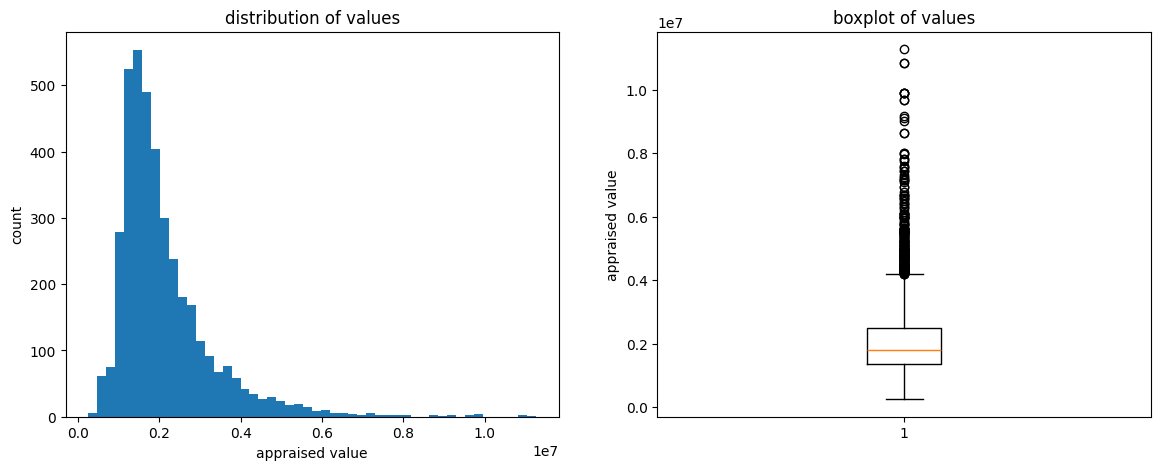

In [114]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))
axes[0].hist(df.total_appraised_val.dropna(), bins=50)
axes[0].set_xlabel('appraised value')
axes[0].set_ylabel('count')
axes[0].set_title('distribution of values')

axes[1].boxplot(df.total_appraised_val.dropna())
axes[1].set_ylabel('appraised value')
axes[1].set_title('boxplot of values')
print(f'median of total valuations: {df.total_appraised_val.median()}')
df.total_appraised_val.describe()

median of total square feet: 1847.0


count    3563.000000
mean     1998.427449
std       965.375494
min       144.000000
25%      1303.000000
50%      1847.000000
75%      2478.500000
max      8734.000000
Name: total_finished_sqft, dtype: float64

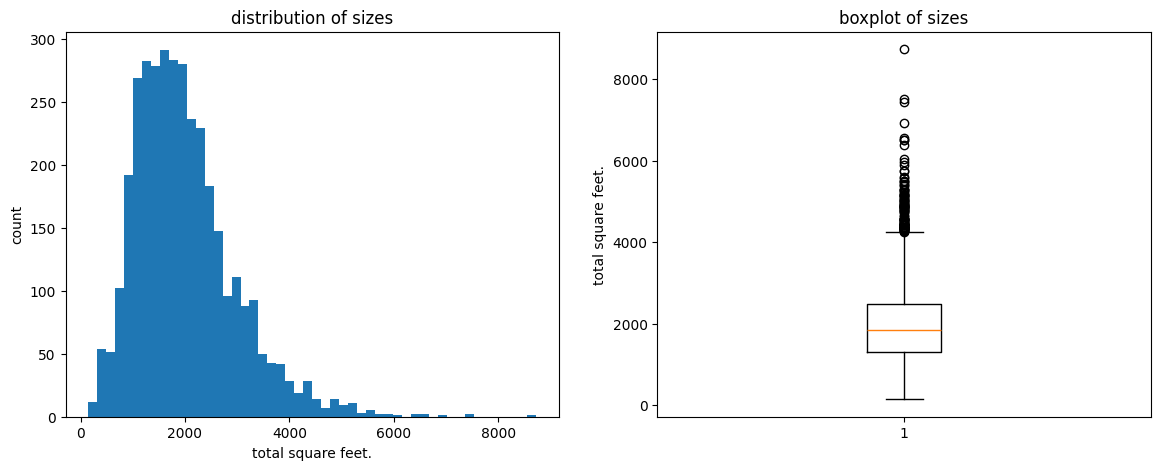

In [115]:
fig, axes = plt.subplots(1, 2, figsize = (14, 5))
axes[0].hist(df.total_finished_sqft.dropna(), bins=50)
axes[0].set_xlabel('total square feet.')
axes[0].set_ylabel('count')
axes[0].set_title('distribution of sizes')

axes[1].boxplot(df.total_finished_sqft.dropna())
axes[1].set_ylabel('total square feet.')
axes[1].set_title('boxplot of sizes')
print(f'median of total square feet: {df.total_finished_sqft.median()}')
df.total_finished_sqft.describe()

Text(0, 0.5, 'count')

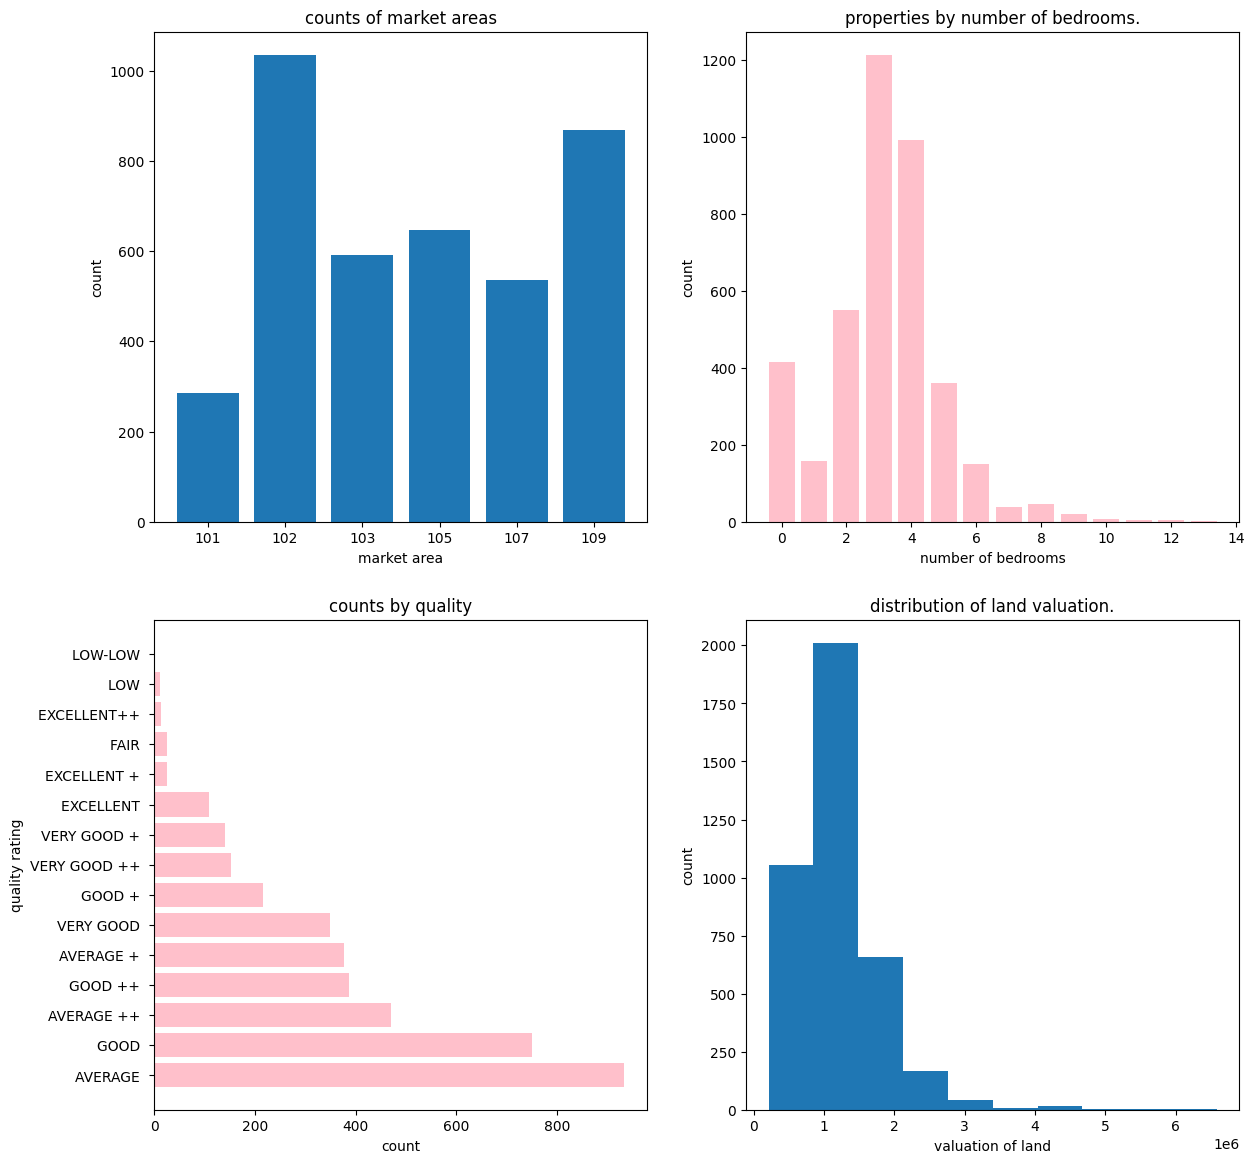

In [116]:
fig, axes = plt.subplots(2, 2, figsize = (14, 14))

market_counts = df.market_area.value_counts().sort_index()
axes[0, 0].bar(market_counts.index.astype(str), market_counts.values)
axes[0, 0].set_xlabel('market area')
axes[0, 0].set_ylabel('count')
axes[0, 0].set_title('counts of market areas')

br_counts = df.nbr_bed_room.value_counts().sort_index()
axes[0,1].bar(br_counts.index, br_counts.values, color='pink')
axes[0,1].set_xlabel('number of bedrooms')
axes[0,1].set_ylabel('count')
axes[0,1].set_title('properties by number of bedrooms.')

quality_rating = df.quality.value_counts()
axes[1, 0].barh(quality_rating.index, quality_rating.values, color = 'pink')
axes[1, 0].set_title('counts by quality')
axes[1, 0].set_xlabel('count')
axes[1, 0].set_ylabel('quality rating')

axes[1, 1].hist(df.land_appraised_val)
axes[1, 1].set_title('distribution of land valuation.')
axes[1, 1].set_xlabel('valuation of land')
axes[1, 1].set_ylabel('count')


Text(0, 0.5, 'Home Value')

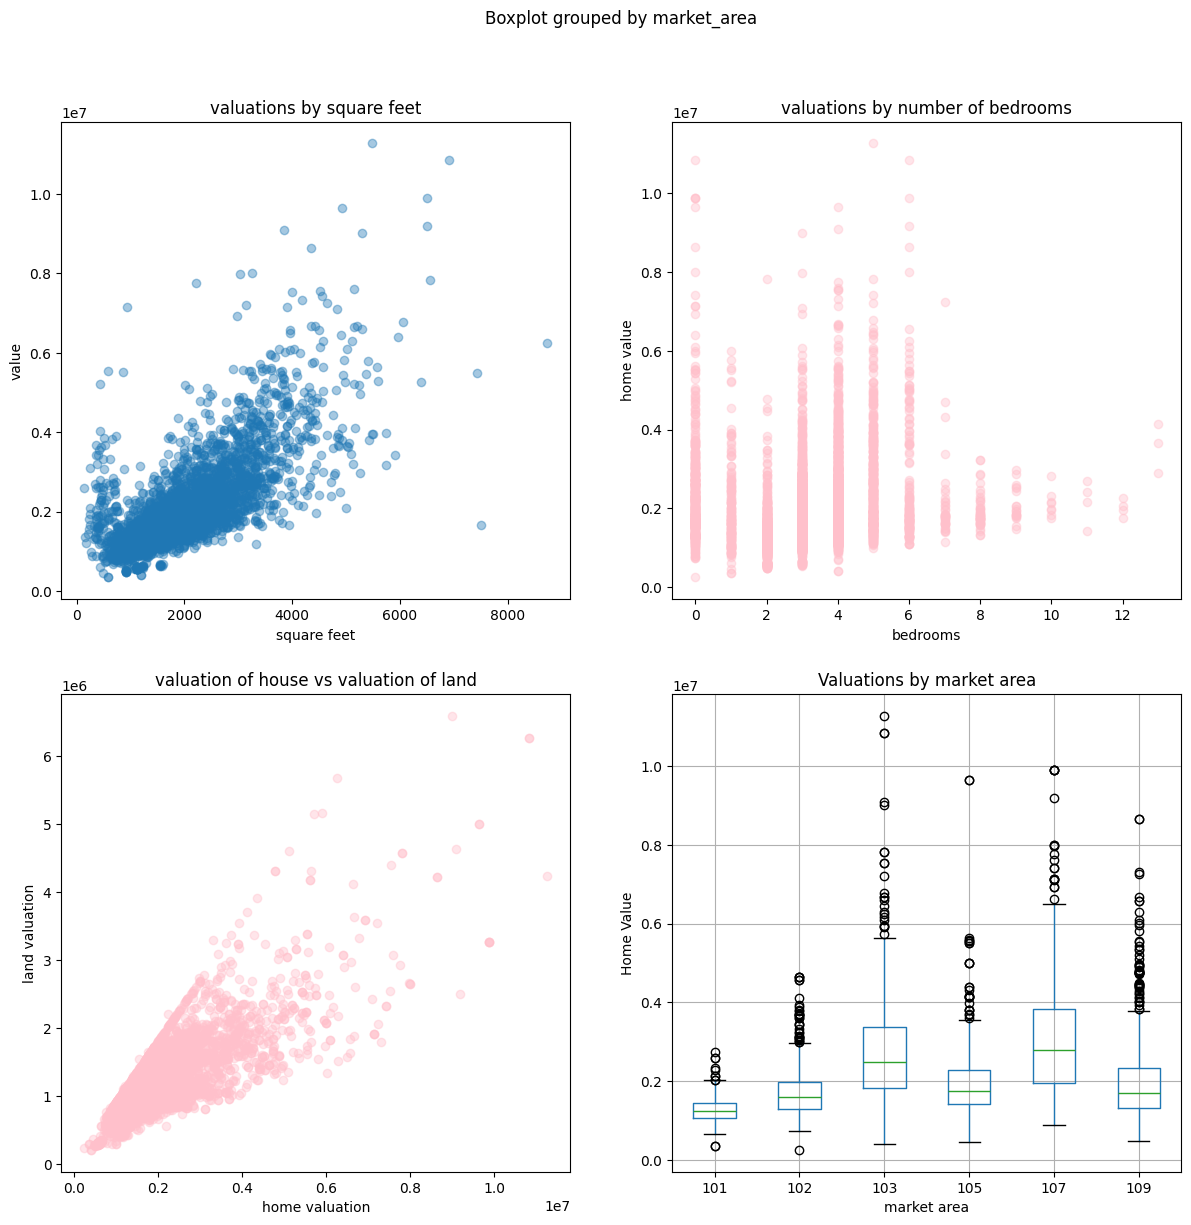

In [117]:
fig, axes = plt.subplots(2, 2, figsize = (14, 14))
one = axes[0,0]
two = axes[0,1]
three = axes[1,0]
four = axes[1,1]

one.scatter(df.total_finished_sqft, df.total_appraised_val, alpha = 0.4)
one.set_title('valuations by square feet')
one.set_xlabel('square feet')
one.set_ylabel('value')

two.scatter(df.nbr_bed_room, df.total_appraised_val, alpha = 0.4, color = 'pink')
two.set_title('valuations by number of bedrooms')
two.set_xlabel('bedrooms')
two.set_ylabel('home value')

three.scatter(df.total_appraised_val, df.land_appraised_val, color = 'pink', alpha = 0.4)
three.set_title('valuation of house vs valuation of land')
three.set_xlabel('home valuation')
three.set_ylabel('land valuation')

df.boxplot(column='total_appraised_val', by='market_area', ax = four)
four.set_title('Valuations by market area')
four.set_xlabel('market area')
four.set_ylabel('Home Value')

               count       mean     median        std
quality                                              
AVERAGE          933  1348492.0  1249000.0   597877.0
AVERAGE +        377  1416996.0  1374300.0   336897.0
AVERAGE ++       471  1629391.0  1577700.0   422472.0
EXCELLENT        108  5107416.0  4958400.0  1328869.0
EXCELLENT +       25  6402072.0  6091900.0  1621727.0
EXCELLENT++       14  7798651.0  7646650.0  1730855.0
FAIR              25  1139107.0   949400.0   592589.0
GOOD             750  1963765.0  1808550.0   756000.0
GOOD +           215  2086816.0  2030900.0   405454.0
GOOD ++          387  2388815.0  2303100.0   587710.0
LOW               12  1740158.0  1664100.0   653661.0
LOW-LOW            1   782600.0   782600.0        NaN
VERY GOOD        350  2940714.0  2752950.0   831283.0
VERY GOOD +      140  3366677.0  3389250.0   691000.0
VERY GOOD ++     152  4043211.0  4003750.0   754430.0


<Axes: >

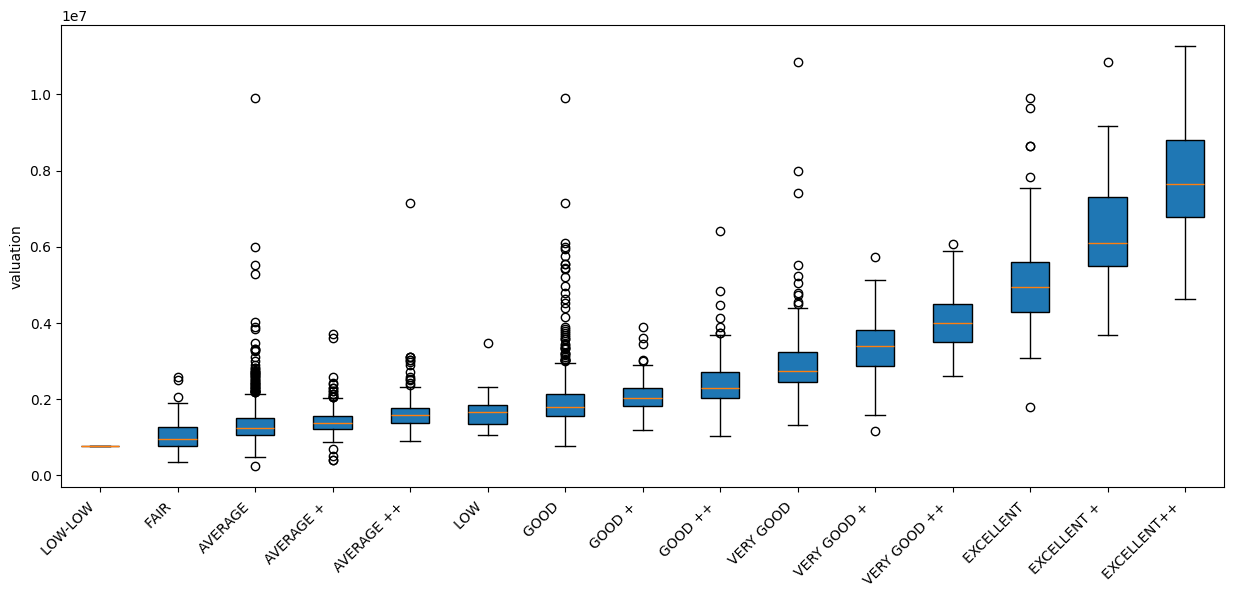

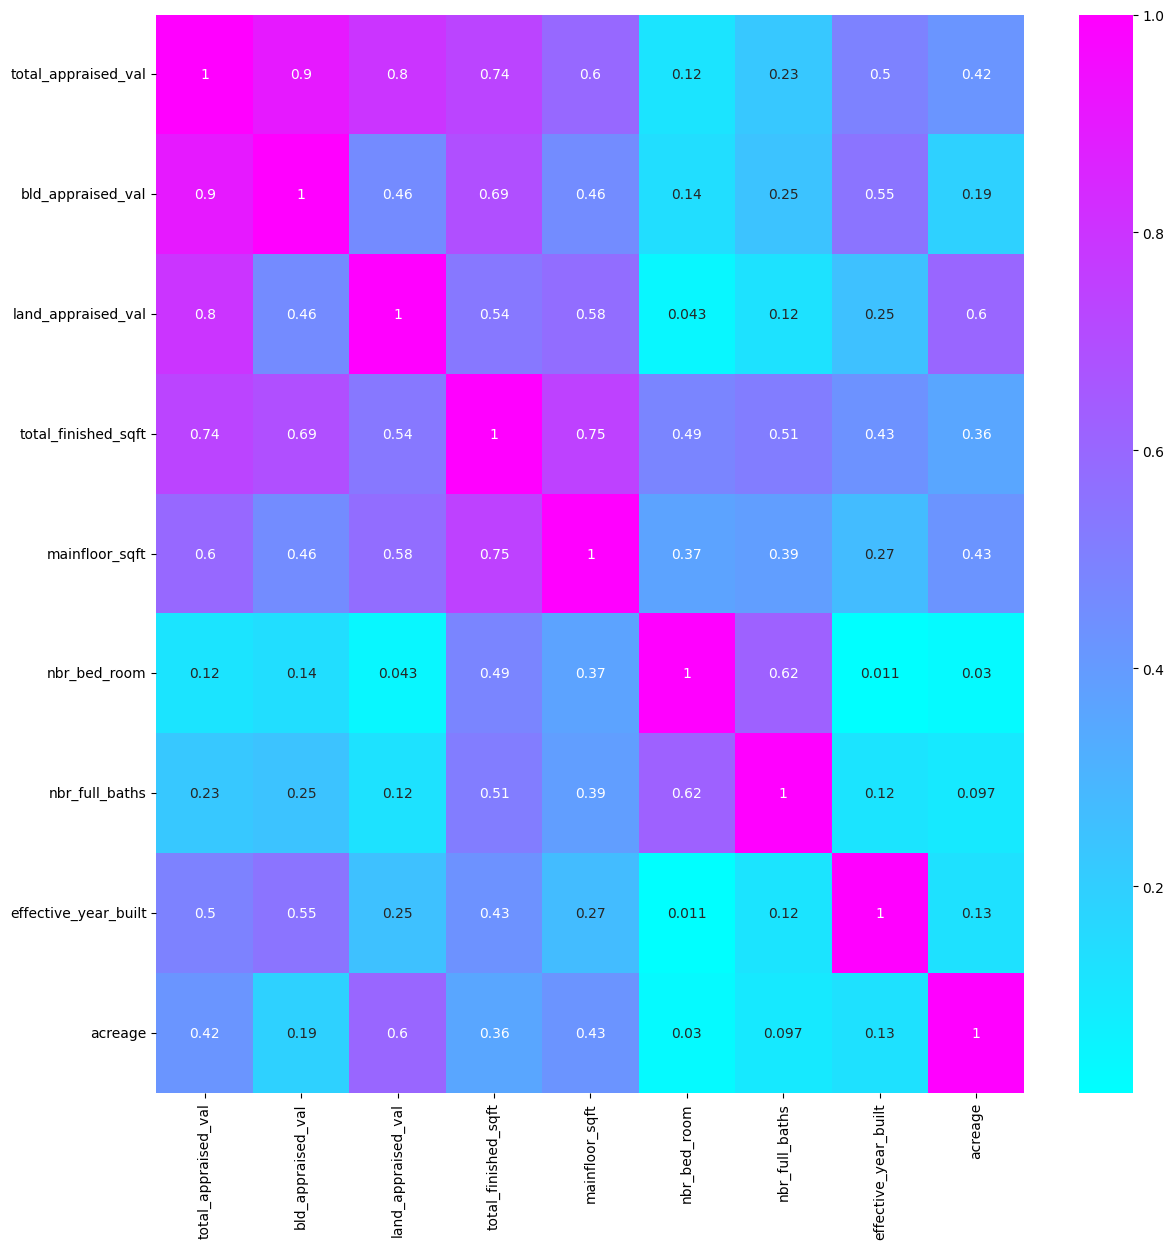

In [118]:
fig, ax = plt.subplots(figsize=(15, 6))
quality_order = df.groupby('quality')['total_appraised_val'].median().sort_values().index
quality_data = [df[df['quality'] == q]['total_appraised_val'].dropna() for q in quality_order]
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('valuation')

bp = ax.boxplot(quality_data, tick_labels=quality_order, patch_artist=True)
print(df.groupby('quality')['total_appraised_val'].agg(['count', 'mean', 'median', 'std']).round(0))
categories = ['total_appraised_val', 'bld_appraised_val', 'land_appraised_val', 'total_finished_sqft', 'mainfloor_sqft', 'nbr_bed_room', 'nbr_full_baths', 'effective_year_built', 'acreage']
available_cols = [cat for cat in categories if cat in df.columns]
corr_matrix = df[categories].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='cool')



In [119]:
# Verify column names
print("=== sales_df ===")
display(sales_df.head())
display(sales_df.info())

print("=== time_trend_adjustments_df ===")
display(time_trend_adjustments_df.head())
display(time_trend_adjustments_df.info())

print("=== valuations_df ===")
display(valuations_df.head())
display(valuations_df.info())

print("=== property_df ===")
display(property_df.head())
display(property_df.info())

print("=== building_df ===")
display(building_df.head())
display(building_df.info())
print("=== land_df ===")
display(land_df.head())
display(land_df.info())

=== sales_df ===


,strap,transaction_date,sales_cd,sales_cd_dscr,price,year,month,day
0,R0000008,1978-01-03,Q,qualified,65000,1978,01,03
1,R0000019,1980-08-13,U,unqualified,75000,1980,08,13
2,R0000019,1985-04-08,U,unqualified,110600,1985,04,08
3,R0000019,1992-04-22,Q,qualified,126400,1992,04,22
4,R0000019,2000-06-02,Q,qualified,332000,2000,06,02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   strap             9598 non-null   object
 1   transaction_date  9598 non-null   object
 2   sales_cd          9598 non-null   object
 3   sales_cd_dscr     9598 non-null   object
 4   price             9598 non-null   int64 
 5   year              9598 non-null   object
 6   month             9598 non-null   object
 7   day               9598 non-null   object
dtypes: int64(1), object(7)
memory usage: 600.0+ KB


None

=== time_trend_adjustments_df ===


,year,month,market_area_101,market_area_102,market_area_103,market_area_104,market_area_105,market_area_106,market_area_107,market_area_108,market_area_109
0,2017,7,1.4591,1.6070,1.6384,1.5174,1.5532,1.5728,1.5938,1.2996,1.4132
1,2017,8,1.4485,1.5989,1.6288,1.5075,1.5481,1.5654,1.5830,1.2996,1.4132
2,2017,9,1.4379,1.5908,1.6193,1.4977,1.5430,1.5579,1.5723,1.2996,1.4132
3,2017,10,1.4273,1.5828,1.6099,1.4880,1.5379,1.5505,1.5616,1.2996,1.3913
4,2017,11,1.4169,1.5748,1.6005,1.4783,1.5329,1.5431,1.5510,1.2996,1.3840


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             60 non-null     int64  
 1   month            60 non-null     int64  
 2   market_area_101  60 non-null     float64
 3   market_area_102  60 non-null     float64
 4   market_area_103  60 non-null     float64
 5   market_area_104  60 non-null     float64
 6   market_area_105  60 non-null     float64
 7   market_area_106  60 non-null     float64
 8   market_area_107  60 non-null     float64
 9   market_area_108  60 non-null     float64
 10  market_area_109  60 non-null     float64
dtypes: float64(9), int64(2)
memory usage: 5.3 KB


None

=== valuations_df ===


,strap,tax_yr,bld_appraised_val,land_appraised_val,total_appraised_val,bld_assessed_val,land_assessed_val,total_assessed_val
0,R0000008,2024,242500,874000,1116500,16248.0,NaN,71121
1,R0000019,2024,268200,757100,1025300,17969.0,NaN,65010
2,R0000021,2024,991300,1053600,2044900,66418.0,NaN,133323
3,R0000024,2024,531300,797000,1328300,31912.0,NaN,85311
4,R0000026,2024,1051300,1238700,2290000,70437.0,NaN,149745


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   strap                3431 non-null   object 
 1   tax_yr               3431 non-null   int64  
 2   bld_appraised_val    3431 non-null   int64  
 3   land_appraised_val   3431 non-null   int64  
 4   total_appraised_val  3431 non-null   int64  
 5   bld_assessed_val     3429 non-null   float64
 6   land_assessed_val    0 non-null      float64
 7   total_assessed_val   3431 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 214.6+ KB


None

=== property_df ===


,strap,market_area,address,unincorporated,sub_code,sub_dscr,section,township,range,mill_levy,folio
0,R0000008,102,"2002 COLUMBINE AVE, BOULDER CO",False,3822,INTERURBAN PARK - BO,6,1S,70,86.359,157706112001
1,R0000019,109,"2434 BLUFF ST, BOULDER CO",False,850,BOURGOGNE-PINOT SUB - BO,30,1N,70,86.359,146330639001
2,R0000021,105,"1219 6TH ST, BOULDER CO",False,8424,VERMONT - BO,36,1N,71,86.359,146136135006
3,R0000024,105,"655 MARINE ST, BOULDER CO",False,7434,SMITHS TO WEST BOULDER - BO,36,1N,71,86.359,146136122012
4,R0000026,102,"907 12TH ST, BOULDER CO",False,8343,UNIVERSITY PLACE - BO,31,1N,70,86.359,146331314010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   strap           3431 non-null   object 
 1   market_area     3431 non-null   int64  
 2   address         3431 non-null   object 
 3   unincorporated  3431 non-null   bool   
 4   sub_code        3431 non-null   int64  
 5   sub_dscr        3431 non-null   object 
 6   section         3431 non-null   int64  
 7   township        3431 non-null   object 
 8   range           3431 non-null   int64  
 9   mill_levy       3431 non-null   float64
 10  folio           3431 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 271.5+ KB


None

=== building_df ===


,strap,bld_num,effective_year_built,design_code,design,quality,quality_code,bldg_class_code,bldg_class,construction_type_code,...,mainfloor_sqft,bsmt_sqft,bsmt_type_code,bsmt_type,car_storage_type_code,car_storage_type,ext_wall_code,ext_wall,ac,heating
0,R0000008,1,1954,10,1 Story - Ranch,AVERAGE +,31,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,1558.0,NaN,NaN,NaN,NaN,NaN,40.0,Brick Veneer,False,True
1,R0000019,1,1970,10,1 Story - Ranch,AVERAGE,30,1212,SINGLE FAM RES IMPROVEMENTS,310.0,...,942.0,850.0,BGF,GARDEN BASEMENT FINISHED AREA,NaN,NaN,10.0,Frame Wood/Shake,True,True
2,R0000021,2,1985,60,Studio,GOOD,40,1212,SINGLE FAM RES IMPROVEMENTS,310.0,...,NaN,NaN,NaN,NaN,GRD,DETACHED GARAGE,10.0,Frame Wood/Shake,False,True
3,R0000021,1,1990,20,2-3 Story,GOOD +,41,1212,SINGLE FAM RES IMPROVEMENTS,310.0,...,1170.0,334.0,BSF,SUBTERRANEAN BASEMENT FINISHED AREA,GRC,CARPORT AREA,10.0,Frame Wood/Shake,False,True
4,R0000024,1,1960,20,2-3 Story,GOOD,40,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,799.0,465.0,BGF,GARDEN BASEMENT FINISHED AREA,GRA,ATTACHED GARAGE AREA,70.0,Brick on Block,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   strap                   3957 non-null   object 
 1   bld_num                 3957 non-null   int64  
 2   effective_year_built    3957 non-null   int64  
 3   design_code             3957 non-null   int64  
 4   design                  3957 non-null   object 
 5   quality                 3957 non-null   object 
 6   quality_code            3957 non-null   int64  
 7   bldg_class_code         3957 non-null   int64  
 8   bldg_class              3957 non-null   object 
 9   construction_type_code  3743 non-null   float64
 10  construction_type       3736 non-null   object 
 11  nbr_bed_room            3957 non-null   float64
 12  nbr_full_baths          3957 non-null   float64
 13  nbr_three_qtr_baths     3957 non-null   float64
 14  nbr_half_baths          3957 non-null   

None

=== land_df ===


,strap,land_class,land_class_dscr,sqft,acreage
0,R0000008,1112,SINGLE FAM.RES.-LAND,6801,0.156
1,R0000019,1112,SINGLE FAM.RES.-LAND,3606,0.083
2,R0000021,1112,SINGLE FAM.RES.-LAND,6884,0.158
3,R0000024,1112,SINGLE FAM.RES.-LAND,7245,0.166
4,R0000026,1112,SINGLE FAM.RES.-LAND,12737,0.292


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   strap            3433 non-null   object 
 1   land_class       3433 non-null   int64  
 2   land_class_dscr  3433 non-null   object 
 3   sqft             3433 non-null   int64  
 4   acreage          3433 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 134.2+ KB


None

## Part C – Exploratory Data Analysis

### 2. Data Structure and Missingness

This section confirms that the datasets have the correct structure for the questions, and a inspection is complete for data types and missingness.

In [120]:
# Imports
import pandas as pd      
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# Load datasets
building_df = pd.read_csv('./datasets/building.csv')
land_df = pd.read_csv('./datasets/land.csv')
property_df = pd.read_csv('./datasets/property.csv')
sales_df = pd.read_csv('./datasets/sales.csv')
time_trend_adjustments_df = pd.read_csv('./datasets/time_trend_adjustments.csv')
valuations_df = pd.read_csv('./datasets/valuations.csv')

print("All datasets loaded.")


All datasets loaded.



This section confirms that the required datasets are available and appropriately structured to support analysis of residential property valuation and demand across Boulder County. The overview establishes that the data spans valuation, structural, geographic, and temporal dimensions needed to address the questions defined in Part A.

In [122]:
# overview showing rows and columns
datasets = {
    "building": building_df,
    "land": land_df,
    "property": property_df,
    "sales": sales_df,
    "time_trend_adjustments": time_trend_adjustments_df,
    "valuations": valuations_df
}

summary = []
for name, d in datasets.items():
    summary.append({
        "dataset": name,
        "rows": d.shape[0],
        "columns": d.shape[1]
    })

pd.DataFrame(summary).sort_values("dataset")


,dataset,rows,columns
0,building,3957,27
1,land,3433,5
2,property,3431,11
3,sales,9598,5
4,time_trend_adjustments,60,12
5,valuations,3431,8


Exploring Granularity and Geographic Coverage

This section verifies that the data is organized at the individual property level and includes sufficient geographic identifiers to enable comparison across market areas and subdivisions. Adequate geographic coverage is necessary to evaluate valuation consistency and fairness.

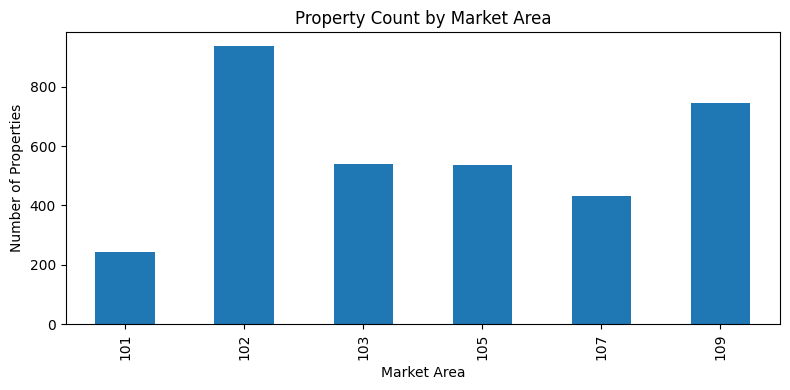

In [123]:
# Distribution of properties across market areas
plt.figure(figsize=(8,4))
property_df["market_area"].value_counts().sort_index().plot(kind="bar")
plt.title("Property Count by Market Area")
plt.xlabel("Market Area")
plt.ylabel("Number of Properties")
plt.tight_layout()
plt.show()


Exploring Data Types and Variable Readiness

This section checks that key variables needed for the three research questions are present and stored in appropriate formats. Confirming data types early reduces avoidable errors in later analysis and ensures that numeric, categorical, and date fields can be explored correctly.

In [124]:
for name, d in datasets.items():
    print("\n" + name.upper())
    display(d.dtypes.value_counts())


BUILDING


object     10
float64    10
int64       5
bool        2
Name: count, dtype: int64


LAND


object     2
int64      2
float64    1
Name: count, dtype: int64


PROPERTY


object     5
int64      4
bool       1
float64    1
Name: count, dtype: int64


SALES


object    4
int64     1
Name: count, dtype: int64


TIME_TREND_ADJUSTMENTS


float64    9
int64      3
Name: count, dtype: int64


VALUATIONS


int64      5
float64    2
object     1
Name: count, dtype: int64

In [125]:
key_cols = [
    "strap",
    "market_area",
    "sub_cd",
    "transaction_date",
    "price",
    "total_appraised_val",
    "total_finished_sqft",
    "design",
    "price_per_sqft",
    "has_car_storage_or_basement",
    "design_value_tier"
]

present = [c for c in key_cols if c in df.columns]
missing = [c for c in key_cols if c not in df.columns]

print("Present in df:", present)
print("Missing from df:", missing)


Present in df: ['strap', 'market_area', 'total_appraised_val', 'total_finished_sqft', 'design', 'price_per_sqft', 'has_car_storage_or_basement', 'design_value_tier']
Missing from df: ['sub_cd', 'transaction_date', 'price']


Exploring Missingness Analysis

This section examines patterns of missing data to distinguish between structural absence and potential data quality concerns. Understanding missingness is important for interpreting valuation and amenity related variables without introducing bias in later analysis.

In [126]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_pct.head(25)


land_assessed_val         100.000000
bsmt_type_code             43.412418
bsmt_sqft                  43.412418
bsmt_type                  43.412418
car_storage_type           40.030288
car_storage_type_code      40.030288
mainfloor_sqft             10.348309
price_per_sqft             10.070671
total_finished_sqft        10.070671
construction_type           5.628470
construction_type_code      5.451792
design_value_tier           5.300353
ext_wall                    4.391721
ext_wall_code               4.189803
quality_code                0.050480
nbr_rooms_nobath            0.050480
nbr_half_baths              0.050480
nbr_three_qtr_baths         0.050480
nbr_full_baths              0.050480
nbr_bed_room                0.050480
ac                          0.050480
heating                     0.050480
bldg_class_code             0.050480
bldg_class                  0.050480
quality                     0.050480
dtype: float64

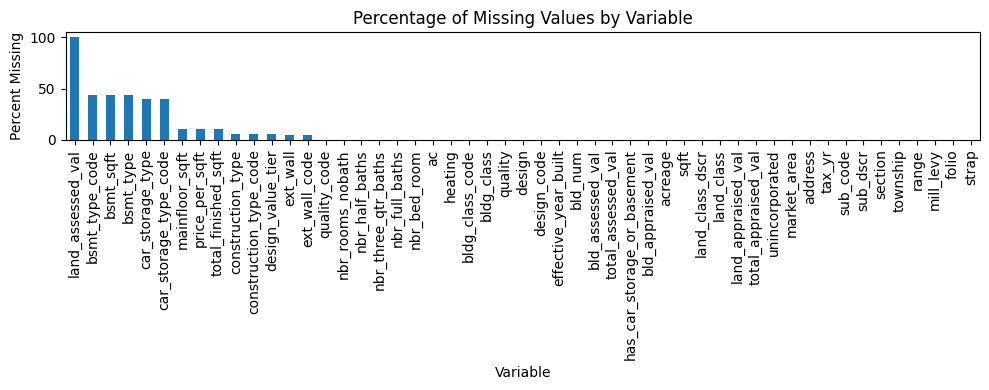

In [127]:
#Option: Missingness by Variable
# missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(10,4))
missing_pct.plot(kind="bar")
plt.title("Percentage of Missing Values by Variable")
plt.xlabel("Variable")
plt.ylabel("Percent Missing")
plt.tight_layout()
plt.show()

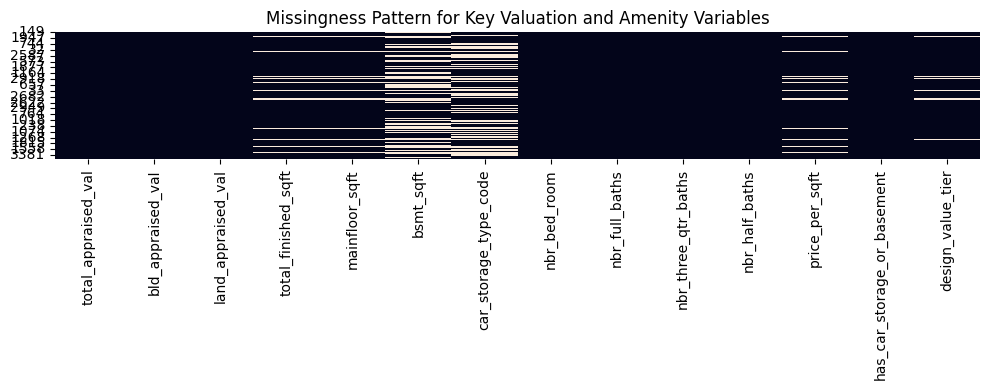

In [128]:
# Option: ample_df = df.sample(n=500, random_state=42) The entire heatmap was too long to be visualy effecive 
# Focus missingness visualization on analytically relevant variables
missing_cols = [
    "total_appraised_val",
    "bld_appraised_val",
    "land_appraised_val",
    "total_finished_sqft",
    "mainfloor_sqft",
    "bsmt_sqft",
    "car_storage_type_code",
    "nbr_bed_room",
    "nbr_full_baths",
    "nbr_three_qtr_baths",
    "nbr_half_baths",
    "price_per_sqft",
    "has_car_storage_or_basement",
    "design_value_tier"
]

sample_df = df[missing_cols].sample(n=500, random_state=42)

plt.figure(figsize=(10,4))
sns.heatmap(sample_df.isna(), cbar=False)
plt.title("Missingness Pattern for Key Valuation and Amenity Variables")
plt.tight_layout()
plt.show()

Feature: Price per Square Foot

This section examines the distribution of price per square foot, a normalized measure of property value that allows comparison across homes of different sizes. This feature supports analysis of value drivers by highlighting variation that is not apparent when using total appraised value alone.

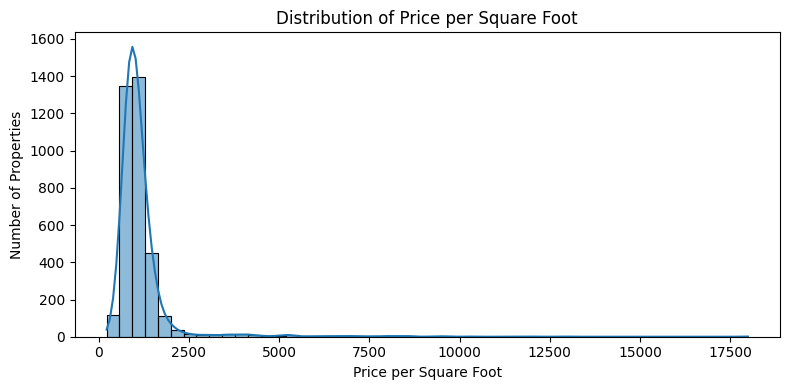

In [129]:
plt.figure(figsize=(8,4))
sns.histplot(df["price_per_sqft"], bins=50, kde=True)
plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Number of Properties")
plt.tight_layout()
plt.show()

Feature: Additional Evaluation of Price Per Square Foot for Homes valued over 3500

This section examines how price per square foot changes for larger homes, with a focus on properties around 3,500 square feet. The results show that price per square foot generally decreases as home size increases, indicating diminishing returns to additional square footage. Homes in this size range tend to have lower and more stable price per square foot compared to smaller homes. Remaining variation suggests that design and construction quality still play an important role in determining value.

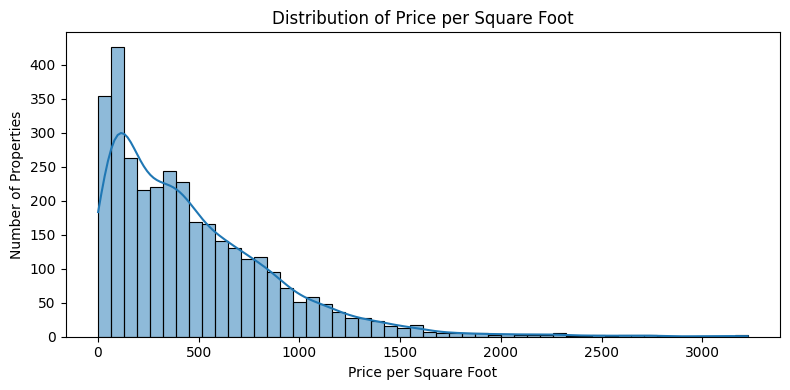

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load files
building = pd.read_csv("./Datasets/building.csv")
property_df = pd.read_csv("./Datasets/property.csv")
land = pd.read_csv("./Datasets/land.csv")
sales = pd.read_csv("./Datasets/sales.csv")
valuations = pd.read_csv("./Datasets/valuations.csv")
tta = pd.read_csv("./Datasets/time_trend_adjustments.csv")  # not used in this chart, but loaded for completeness

# Prepare latest sale
sales["transaction_date"] = pd.to_datetime(sales["transaction_date"], errors="coerce")
sales["price"] = pd.to_numeric(sales["price"], errors="coerce")

sales_latest = (
    sales.dropna(subset=["strap", "transaction_date", "price"])
         .sort_values(["strap", "transaction_date"])
         .groupby("strap", as_index=False)
         .tail(1)
)

# Merge
df = (
    property_df.merge(building, on="strap", how="left")
               .merge(land, on="strap", how="left")
               .merge(valuations, on="strap", how="left")
               .merge(sales_latest[["strap", "transaction_date", "price"]], on="strap", how="left")
)

# Create feature: price_per_sqft
# Using total_finished_sqft as the living area
df["total_finished_sqft"] = pd.to_numeric(df["total_finished_sqft"], errors="coerce")

df["price_per_sqft"] = df["price"] / df["total_finished_sqft"]

# Clean invalid values
df.loc[(df["price_per_sqft"] <= 0) | (df["price_per_sqft"].isna()) | (df["price_per_sqft"] == np.inf), "price_per_sqft"] = np.nan

# Cap extreme outliers for readability
df.loc[df["price_per_sqft"] > df["price_per_sqft"].quantile(0.99), "price_per_sqft"] = np.nan

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(df["price_per_sqft"].dropna(), bins=50, kde=True)

plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Number of Properties")

plt.tight_layout()

# Save
plt.savefig("feature_price_per_sqft_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

Feature: Basement or Garage Indicator

This section compares property value for homes with and without a basement or enclosed car storage to evaluate whether this demand-relevant amenity is associated with higher valuations. The indicator also improves interpretability by reducing ambiguity when amenity-related fields are missing.

In [131]:
import pandas as pd

print("df type:", type(df))
print("df shape:", getattr(df, "shape", None))

cols = list(getattr(df, "columns", []))
print("Number of columns:", len(cols))
print("First 50 columns:", cols[:50])


df type: <class 'pandas.core.frame.DataFrame'>
df shape: (3962, 51)
Number of columns: 51
First 50 columns: ['strap', 'market_area', 'address', 'unincorporated', 'sub_code', 'sub_dscr', 'section', 'township', 'range', 'mill_levy', 'folio', 'bld_num', 'effective_year_built', 'design_code', 'design', 'quality', 'quality_code', 'bldg_class_code', 'bldg_class', 'construction_type_code', 'construction_type', 'nbr_bed_room', 'nbr_full_baths', 'nbr_three_qtr_baths', 'nbr_half_baths', 'nbr_rooms_nobath', 'total_finished_sqft', 'mainfloor_sqft', 'bsmt_sqft', 'bsmt_type_code', 'bsmt_type', 'car_storage_type_code', 'car_storage_type', 'ext_wall_code', 'ext_wall', 'ac', 'heating', 'land_class', 'land_class_dscr', 'sqft', 'acreage', 'tax_yr', 'bld_appraised_val', 'land_appraised_val', 'total_appraised_val', 'bld_assessed_val', 'land_assessed_val', 'total_assessed_val', 'transaction_date', 'price']


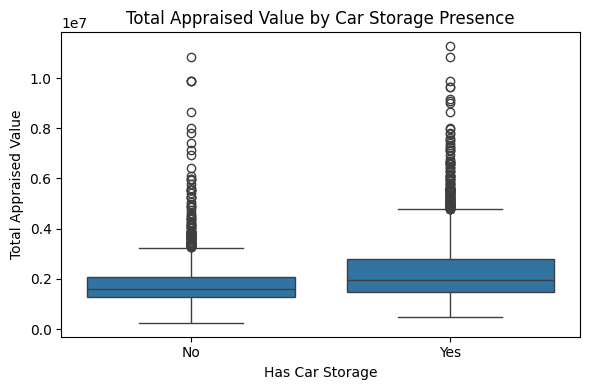

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1)  y is numeric
df["total_appraised_val"] = pd.to_numeric(df["total_appraised_val"], errors="coerce")
# 2) Create a clean Yes/No indicator from car storage
# Assumption: missing/blank/none-type values mean "No", otherwise "Yes"
car = df["car_storage_type"].astype(str).str.strip().str.lower()

no_values = {"nan", "none", "no", "n/a", "na", "", "unknown", "null"}
df["has_car_storage"] = np.where(car.isin(no_values), "No", "Yes")

# 3) Drop rows missing appraised value
plot_df = df.dropna(subset=["has_car_storage", "total_appraised_val"])

# 4) Plot
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="has_car_storage",
    y="total_appraised_val",
    data=plot_df,
    order=["No", "Yes"]
)

plt.title("Total Appraised Value by Car Storage Presence")
plt.xlabel("Has Car Storage")
plt.ylabel("Total Appraised Value")
plt.tight_layout()
plt.show()

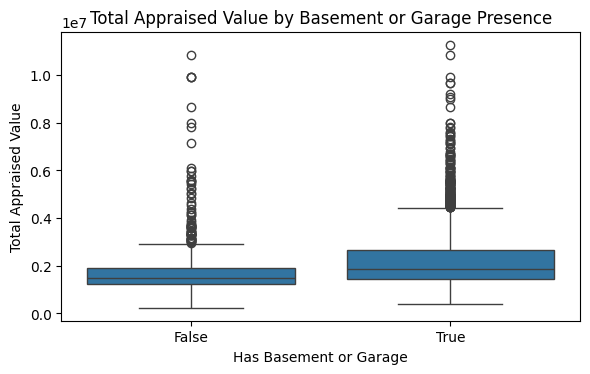

In [133]:
# recreate the column in case df was overwritten
df['has_car_storage_or_basement'] = (df['car_storage_type'].notna() | (df['bsmt_sqft'].fillna(0) > 0))

plt.figure(figsize=(6,4))
sns.boxplot(
    x='has_car_storage_or_basement',
    y='total_appraised_val',
    data=df
)
plt.title("Total Appraised Value by Basement or Garage Presence")
plt.xlabel("Has Basement or Garage")
plt.ylabel("Total Appraised Value")
plt.tight_layout()
plt.show()

Feature: Design Value Tier

This section examines how property values vary within architectural design categories by grouping homes into relative value tiers. Creating tiers within design types supports fair comparisons and helps isolate value differences that are not driven solely by size or layout.

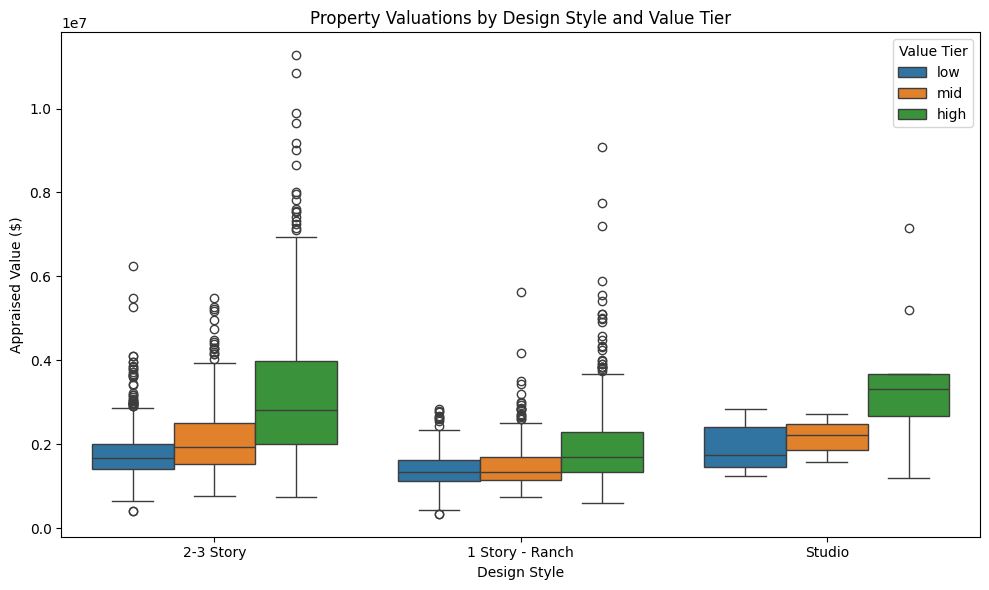

In [134]:
# recreate design_value_tier in case df was overwritten
df['price_per_sqft'] = df['total_appraised_val'] / df['total_finished_sqft']

def assign_tier(group):
    try:
        return pd.qcut(group['price_per_sqft'], q=3, labels=['low', 'mid', 'high'], duplicates='drop')
    except ValueError:
        return pd.Series(['mid'] * len(group), index=group.index)

df['design_value_tier'] = df.groupby('design', group_keys=False).apply(assign_tier, include_groups=False)

# filter to just the main design types
designs_to_show = ['2-3 Story', '1 Story - Ranch', 'Studio']
plot_df = df[df['design'].isin(designs_to_show)]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=plot_df,
    x="design",
    y="total_appraised_val",
    hue="design_value_tier",
    order=designs_to_show
)
plt.title("Property Valuations by Design Style and Value Tier")
plt.xlabel("Design Style")
plt.ylabel("Appraised Value ($)")
plt.legend(title="Value Tier")
plt.tight_layout()
plt.show()

Impact of Missingness

The exploratory analysis suggests that missingness in the dataset is largely structural, meaning that many missing values reflect the absence of certain features rather than data errors. This type of missingness may reduce the number of properties included in analyses that rely on specific variables, such as price per square foot or amenity indicators, which could affect comparisons across geographic areas or property types. In addition, if missingness is more common in certain market areas or design categories, observed valuation or demand patterns may partially reflect differences in data availability rather than true underlying trends. As a result, findings from analyses should be interpreted as exploratory and conditional on the subset of properties with complete information.

Summary and Link to Research Questions

Overall, the exploratory analysis indicates that the dataset is well structured to support investigation of the three research questions outlined in Part A. For Research Question 1, geographic identifiers and the design value tier feature allow valuation comparisons across market areas and subdivisions while accounting for differences in architectural design. For Research Question 2, the price per square foot feature provides a normalized measure of value that supports analysis of property characteristics associated with higher valuations. For Research Question 3, the basement or garage indicator captures demand related amenities that may help explain variation in property values across different areas. Despite limitations related to missingness, the data and engineered features provide a reasonable foundation for further exploratory and comparative analysis.

## Part D - Predicting Home Values


In [135]:
# build the dataset of comparable sales for KNN
# need to merge sales with property/building/land to get all the features

sales_df['transaction_date'] = pd.to_datetime(sales_df['transaction_date'])
sales_df['transaction_year'] = sales_df['transaction_date'].dt.year

# join sales with all the info we need
sales_with_property = sales_df.merge(property_df[['strap', 'market_area']], on='strap', how='left')
sales_with_features = sales_with_property.merge(building_df, on='strap', how='left')
sales_with_features = sales_with_features.merge(land_df[['strap', 'sqft', 'acreage']], on='strap', how='left')
sales_with_features = sales_with_features.rename(columns={'sqft': 'lot_sqft'})

# filter to only qualified sales (arms-length transactions) from 2022 onwards
# per the assignment requirements
qualified_sales = sales_with_features[
    (sales_with_features['sales_cd'] == 'Q') & 
    (sales_with_features['transaction_year'] >= 2022)
].copy()

# create finished basement indicator (1 if finished, 0 otherwise)
qualified_sales['has_finished_basement'] = qualified_sales['bsmt_type'].str.contains('FINISHED', na=False).astype(int)

# fill missing values with 0 or median depending on what makes sense
qualified_sales['total_finished_sqft'] = qualified_sales['total_finished_sqft'].fillna(0)
qualified_sales['lot_sqft'] = qualified_sales['lot_sqft'].fillna(0)
qualified_sales['bsmt_sqft'] = qualified_sales['bsmt_sqft'].fillna(0)
qualified_sales['effective_year_built'] = qualified_sales['effective_year_built'].fillna(qualified_sales['effective_year_built'].median())
qualified_sales['quality_code'] = qualified_sales['quality_code'].fillna(qualified_sales['quality_code'].median())
qualified_sales['nbr_bed_room'] = qualified_sales['nbr_bed_room'].fillna(0)
qualified_sales['nbr_full_baths'] = qualified_sales['nbr_full_baths'].fillna(0)

# also need these columns in the main df so we can predict values for all homes
df['lot_sqft'] = df['sqft'].fillna(0)
df['has_finished_basement'] = df['bsmt_type'].str.contains('FINISHED', na=False).astype(int)
df['bsmt_sqft'] = df['bsmt_sqft'].fillna(0)
df['effective_year_built'] = df['effective_year_built'].fillna(df['effective_year_built'].median())
df['quality_code'] = df['quality_code'].fillna(df['quality_code'].median())
df['nbr_bed_room'] = df['nbr_bed_room'].fillna(0)
df['nbr_full_baths'] = df['nbr_full_baths'].fillna(0)

print(f"Total qualified sales (2022+): {len(qualified_sales)}")

Total qualified sales (2022+): 335


In [136]:
from typing import Union, Optional

# helper function to normalize values between 0 and 1
# without this, sqft (thousands) would dominate over bedrooms (1-5)
def min_max_scale(x: float, x_min: float, x_max: float) -> float:
    """normalize to [0, 1] using min-max scaling"""
    if x_max == x_min:
        return 0.0  # avoid divide by zero
    return (x - x_min) / (x_max - x_min)


# calculate how "far apart" two homes are based on their features
def euclidean_distance(p: list[float], q: list[float]) -> float:
    """euclidean distance between two points"""
    p_arr = np.array(p)
    q_arr = np.array(q)
    return float(np.sqrt(np.sum((p_arr - q_arr) ** 2)))


# main KNN function - finds similar homes and predicts value
def knn_predict_value(
    target_home: Union[dict, pd.Series],
    qualified_sales_df: pd.DataFrame,
    k: int = 5,
    features: Optional[list[str]] = None
) -> tuple[float, pd.DataFrame]:
    """
    predict home value using KNN regression.
    returns (prediction, dataframe of comparable homes used)
    """
    
    # these are the features we use to find similar homes
    # started with just size/age/basement, added quality and beds/baths for better accuracy
    if features is None:
        features = [
            'total_finished_sqft',   # home size
            'lot_sqft',              # lot size
            'effective_year_built',  # age
            'bsmt_sqft',             # basement
            'has_finished_basement', # is basement finished?
            'quality_code',          # construction quality - really important for high-end homes
            'nbr_bed_room',          # bedrooms
            'nbr_full_baths'         # bathrooms
        ]
    
    # per the assignment, only compare to homes in the same market area
    target_market: int = target_home['market_area']
    market_sales: pd.DataFrame = qualified_sales_df[
        qualified_sales_df['market_area'] == target_market
    ].copy()
    
    # if no comparables in this market area, can't predict
    if len(market_sales) == 0:
        return np.nan, pd.DataFrame()
    
    # figure out the min/max for each feature so we can normalize
    scaling_params: dict[str, dict[str, float]] = {}
    for feat in features:
        scaling_params[feat] = {
            'min': float(market_sales[feat].min()),
            'max': float(market_sales[feat].max())
        }
    
    # normalize the target home's features
    target_scaled: list[float] = []
    for feat in features:
        scaled_val = min_max_scale(
            float(target_home[feat]),
            scaling_params[feat]['min'],
            scaling_params[feat]['max']
        )
        target_scaled.append(scaled_val)
    
    # calculate distance from target to every comparable sale
    distances: list[dict] = []
    for idx, sale in market_sales.iterrows():
        sale_scaled: list[float] = []
        for feat in features:
            scaled_val = min_max_scale(
                float(sale[feat]),
                scaling_params[feat]['min'],
                scaling_params[feat]['max']
            )
            sale_scaled.append(scaled_val)
        
        dist: float = euclidean_distance(target_scaled, sale_scaled)
        distances.append({'index': idx, 'distance': dist})
    
    # sort by distance and grab the k closest ones
    distances_df: pd.DataFrame = pd.DataFrame(distances).sort_values('distance')
    k_nearest_indices = distances_df.head(k)['index'].values
    
    # get the actual comparable homes
    comparables: pd.DataFrame = market_sales.loc[k_nearest_indices].copy()
    comparables['distance'] = distances_df.head(k)['distance'].values
    
    # prediction = average price of the k most similar homes
    prediction: float = float(comparables['price'].mean())
    
    return prediction, comparables[['strap', 'price', 'transaction_date', 'distance'] + features]

In [137]:
# example - predict value for a home

example_home = df.iloc[75]

print("TARGET HOME")
print(f"Strap: {example_home['strap']}")
print(f"Address: {example_home['address']}")
print(f"Market Area: {example_home['market_area']}")
print(f"Actual Appraised Value: ${example_home['total_appraised_val']:,.0f}")
print()
print("Features:")
print(f"  - Total Finished Sqft: {example_home['total_finished_sqft']:,.0f}")
print(f"  - Lot Sqft: {example_home['lot_sqft']:,.0f}")
print(f"  - Year Built: {example_home['effective_year_built']:.0f}")
print(f"  - Basement Sqft: {example_home['bsmt_sqft']:.0f}")
print(f"  - Has Finished Basement: {example_home['has_finished_basement']}")

prediction, comparables = knn_predict_value(example_home, qualified_sales, k=5)

print()
print("PREDICTION")
print(f"Predicted Value: ${prediction:,.0f}")
print(f"Actual Appraised Value: ${example_home['total_appraised_val']:,.0f}")
print(f"Difference: ${abs(prediction - example_home['total_appraised_val']):,.0f}")

print()
print("COMPARABLES USED")
print(comparables.to_string(index=False))

TARGET HOME
Strap: R0000250
Address: 1540 HIGH ST, BOULDER CO
Market Area: 109
Actual Appraised Value: $2,958,600

Features:
  - Total Finished Sqft: 2,760
  - Lot Sqft: 9,842
  - Year Built: 1980
  - Basement Sqft: 473
  - Has Finished Basement: 1

PREDICTION
Predicted Value: $2,410,000
Actual Appraised Value: $2,958,600
Difference: $548,600

COMPARABLES USED
   strap   price transaction_date  distance  total_finished_sqft  lot_sqft  effective_year_built  bsmt_sqft  has_finished_basement  quality_code  nbr_bed_room  nbr_full_baths
R0004933 3265000       2022-11-21  0.450584               3096.0      7049                1998.0      915.0                      1          42.0           4.0             2.0
R0005004 2700000       2023-12-08  0.484025               2709.0      7089                1990.0     1120.0                      1          51.0           4.0             1.0
R0009164 2600000       2023-07-06  0.536667               2282.0     20698                1970.0     1278.0     

In [138]:
# run KNN for every home in the dataset
# store actual vs predicted so we can compare
results = []
for i in range(len(df)):
    home = df.iloc[i]
    pred, _ = knn_predict_value(home, qualified_sales)  # _ ignores the comparables df
    results.append({
        'strap': home['strap'],
        'actual': home['total_appraised_val'],
        'predicted': pred
    })

# turn results into a dataframe and drop any that couldn't be predicted
predictions_df = pd.DataFrame(results).dropna()
print(f"Predictions made: {len(predictions_df)}")


Predictions made: 3962


Mean Absolute Error: $426,472
Mean Absolute Percentage Error: 19.8%


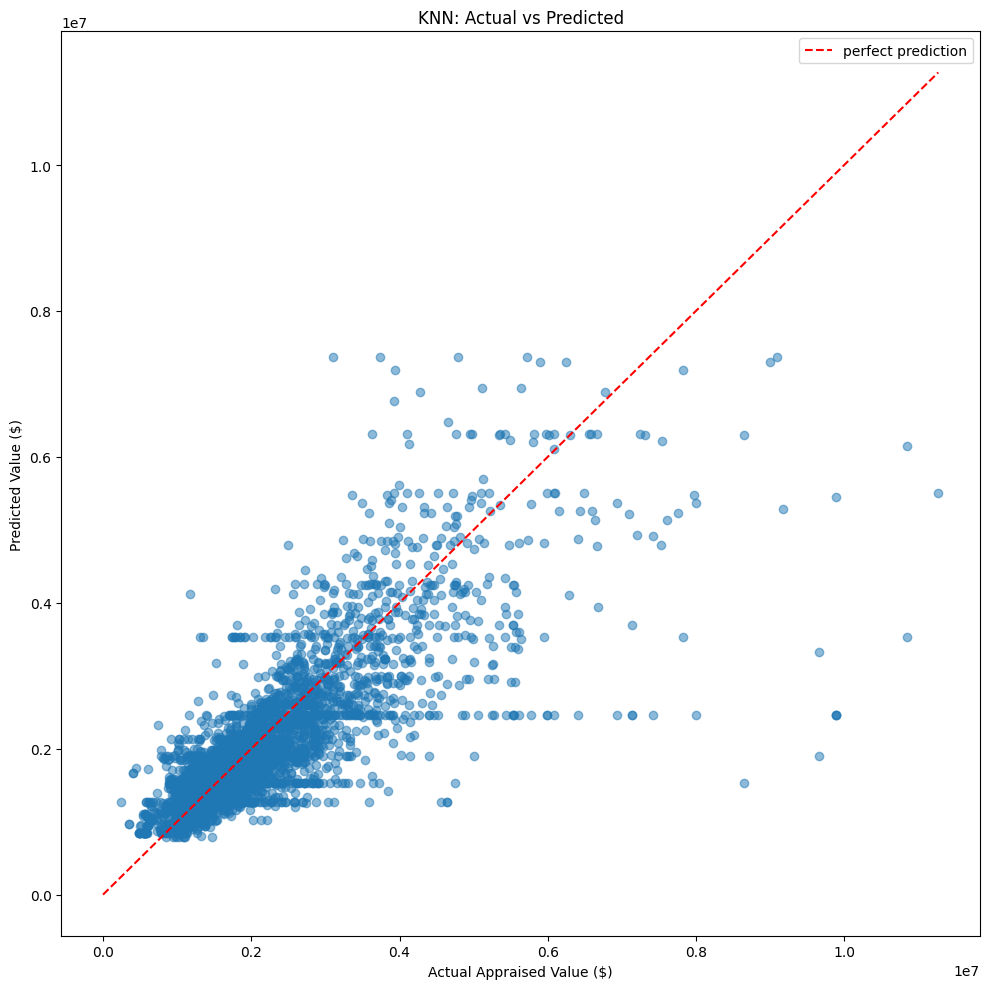

In [ ]:
# visualize how well our predictions match actual values
# if perfect, all points would be on the red dashed line
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(predictions_df['actual'], predictions_df['predicted'], alpha=0.5)

# draw the "perfect prediction" line where predicted = actual
max_val = max(predictions_df['actual'].max(), predictions_df['predicted'].max())
ax.plot([0, max_val], [0, max_val], 'r--', label='perfect prediction')

ax.set_xlabel('Actual Appraised Value ($)')
ax.set_ylabel('Predicted Value ($)')
ax.set_title('KNN: Actual vs Predicted')
ax.legend()

plt.tight_layout()

# calculate error metrics for all predictions
mae = np.abs(predictions_df['actual'] - predictions_df['predicted']).mean()
mape = (np.abs(predictions_df['actual'] - predictions_df['predicted']) / predictions_df['actual']).mean() * 100
print("ALL HOMES:")
print(f"  Mean Absolute Error: ${mae:,.0f}")
print(f"  Mean Absolute Percentage Error: {mape:.1f}%")

# also calculate for just the middle 50% (25th-75th percentile)
# this filters out the extreme values where predictions are harder
q25 = predictions_df['actual'].quantile(0.25)
q75 = predictions_df['actual'].quantile(0.75)
middle_df = predictions_df[(predictions_df['actual'] >= q25) & (predictions_df['actual'] <= q75)]

mae_mid = np.abs(middle_df['actual'] - middle_df['predicted']).mean()
mape_mid = (np.abs(middle_df['actual'] - middle_df['predicted']) / middle_df['actual']).mean() * 100
print(f"\nMIDDLE 50% (${q25:,.0f} - ${q75:,.0f}):")
print(f"  Mean Absolute Error: ${mae_mid:,.0f}")
print(f"  Mean Absolute Percentage Error: {mape_mid:.1f}%")


## Reflection on KNN Predictions

**Quality of Predictions:**
The model performs reasonably well for typical homes, with predictions clustering around the y=x line. However, high-value properties (above ~$5M) are consistently underpredicted due to limited comparable sales in that price range. The initial model used only the suggestions from the assignment's instructions. Adding a few more features made it slightly more accurate, bringing some of the points on the plot closer to the perfect prediction line.

**Influencing Factors:**
Differences between predicted and actual values likely reflect unmeasured characteristics like interior finishes, renovations, views, or unique architectural features that aren't captured in our data.

**Market Area Restriction:**
Removing the market area restriction would increase the pool of comparable homes, potentially improving predictions for unique properties. However, it would ignore location-based value differences—a $2,000 sqft home in one neighborhood may be worth significantly more or less than the same home elsewhere. Keeping the restriction ensures location-appropriate comparisons but limits available comparables in smaller markets.